# 2 Data analysis

## 2.1 The dataset

The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-
2011). A combined cycle power plant (CCPP) is composed of gas turbines, steam turbines and heat
recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which
are combined in one cycle. The net hourly electrical energy output (EP) of the plant is influenced by
four features the ambient temperature (T), the atmospheric pressure (AP), the relative humidity (RH)
and the exhaust vacuum (V).

## 2.2 Preliminary analysis : descriptive statistics
Import the datafile CCPP data.txt. Get familiar with the data and answer the questions :


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('maths.txt', sep='\t')
df.head()

,AT,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


1. [graded question] How many observations are there ? How many variables ?


In [3]:
df.shape

(9568, 5)

There are 9568 observations and 5 variables

2. [graded question] Are there any missing values in the dataset ? If you think it is appropriate,
delete the variables concerning missing values.


In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
EP    0
dtype: int64

3. [graded question] Calculate descriptive statistics for all the variables. You can use graphics of
your choice to help you describe the data (boxplot, scatter plot, etc.). Interpret the results.

In [5]:
df.describe()


,AT,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# 2.3 Principal Component Analysis (PCA)

## Theoretical question
## 1. [graded question] If two variables are perfectly correlated in the dataset, would it be suitable to include both of them in the analysis when performing PCA ? Justify your answer. In contrast, what if the variables are completely uncorrelated ?


If two variables are perfectly correlated, it is not suitable to include both of them in the analysis when performing PCA because it will not bring any new information. In contrast, if the variables are completely uncorrelated, it is suitable to include both of them in the analysis when performing PCA because it will bring new information.

## Practical application : You are going to perform PCA with the CCPP dataset.


## 1. [graded question] Calculate the variance of each variable and interpret the results. Do you think it is necessary to standardize the variables before performing PCA for this dataset ? Why ?

In [6]:
df.var()

AT     55.539357
V     161.490544
AP     35.269152
RH    213.167848
EP    291.282318
dtype: float64

I think it is necessary to standardize the variables before performing PCA for this dataset because some variables of a very high variance. If we don't standardize the variables, the variables with the largest variance will dominate the first principal component. 

This result was expected from our previous anailysis where we saw that the varibale V had de mean value of 54.3 and the variable AP a mean of 1013.2.

## 2. [graded question] Perform PCA using the appropriate function with the appropriate arguments and options considering your answer to the previous question. Analyze the output of the function. Interpret the values of the two first principal component loading vectors.

In [33]:


scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(data_scaled)

loadings = pca.components_[:5]

loadings_df = pd.DataFrame(loadings, columns=df.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
loadings_df



,AT,V,AP,RH,EP
PC1,0.534463,0.490183,-0.334093,-0.293377,-0.525720
PC2,-0.080339,0.078244,-0.598397,0.790266,-0.069448
PC3,-0.078254,-0.450399,-0.712534,-0.483301,0.223009
PC4,-0.398824,0.742087,-0.148875,-0.184225,0.483884
PC5,-0.736689,-0.006812,-0.020839,-0.147953,-0.659484


PC1: This component is mainly influenced by 'AT', 'V', and 'EP'. The positive loadings of 'AT' and 'V' and the negative loading of 'EP' suggest that this component captures the inverse relationship between 'AT', 'V', and 'EP'.

PC2: This component is strongly influenced by 'AP' and 'RH', with a particularly high positive loading for 'RH'. This indicates that PC2 captures the variation in 'RH' and, to a lesser extent, 'AP'.

## 3. [graded question] Calculate the percentage of variance explained (PVE) by each component ? Plot the PVE explained by each component, as well as the cumulative PVE. How many components would you keep ? Why ?


In [10]:
pca.explained_variance_ratio_


array([0.66437362, 0.18291829, 0.11763241, 0.02793114, 0.00714454])

The first component explains 66.4% of the variance, the second one 18.2% etc.

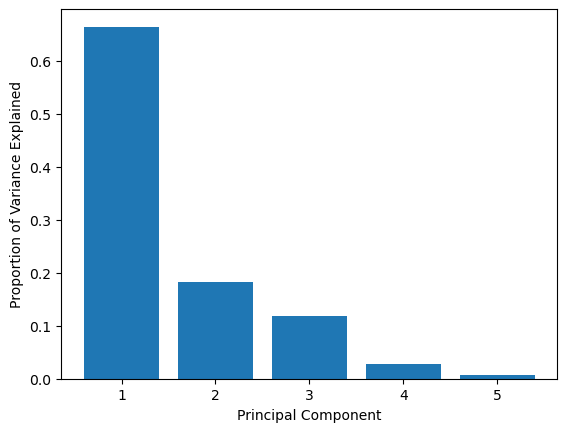

In [15]:
plt.bar(range(1,6), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,6))
plt.show()

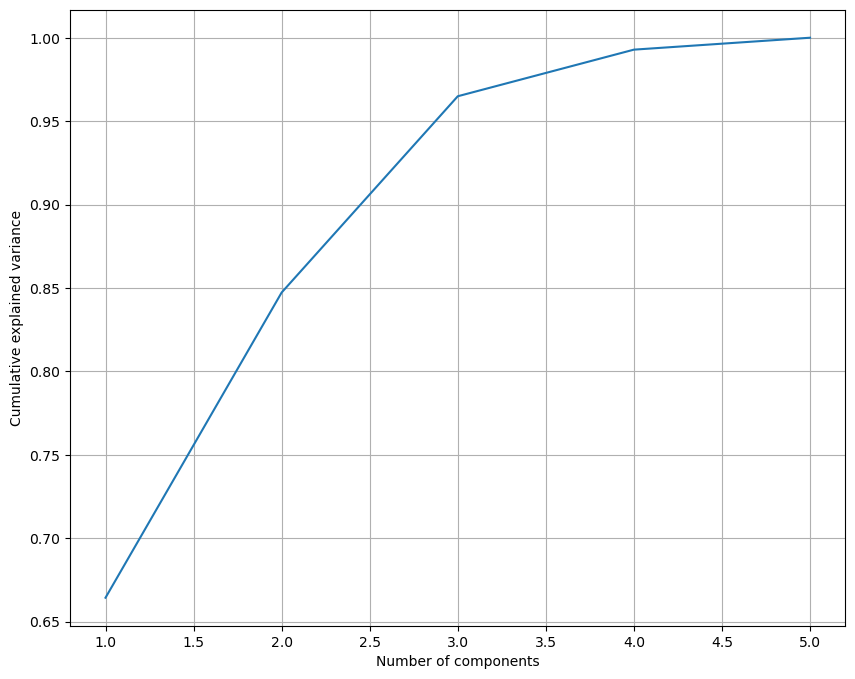

In [24]:
plt.figure(figsize=(10, 8))
x_values = np.arange(1, len(pca.explained_variance_ratio_) + 1)
plt.plot(x_values, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

With only 2 components, we can explain almost 85% of the varaince wich is a good result. But I would take 3 components because the third one explains more than 95% of the variance and it is not negligible.

## 4. [graded question] Use a biplot with a correlation circle to display both the principal component scores and the loading vectors in a single plot. Interpret the results

<Figure size 1000x800 with 0 Axes>

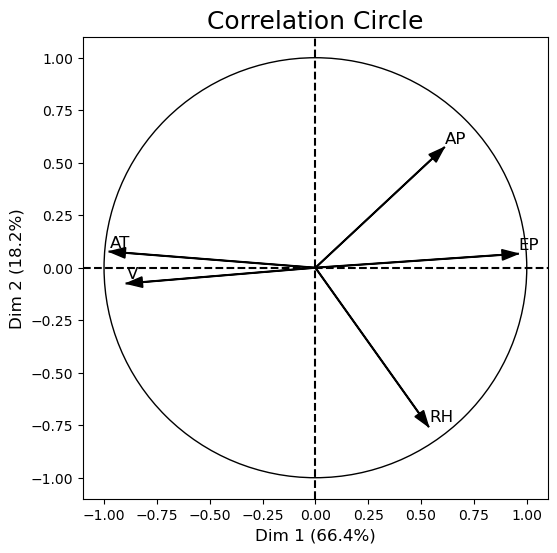

In [40]:
plt.figure(figsize=(10, 8))
plot_pca_correlation_graph(data_scaled, df.columns, dimensions=(1, 2))
plt.show()


# 2.4 Linear Regression

## Practical application
In this part, you are going to perform linear regression using the electrical power output EP as the
target variable.



## [graded question] Calculate the correlation coefficient matrix for the whole dataset.Comment on the results. Which variable is the most correlated with the target EP ?


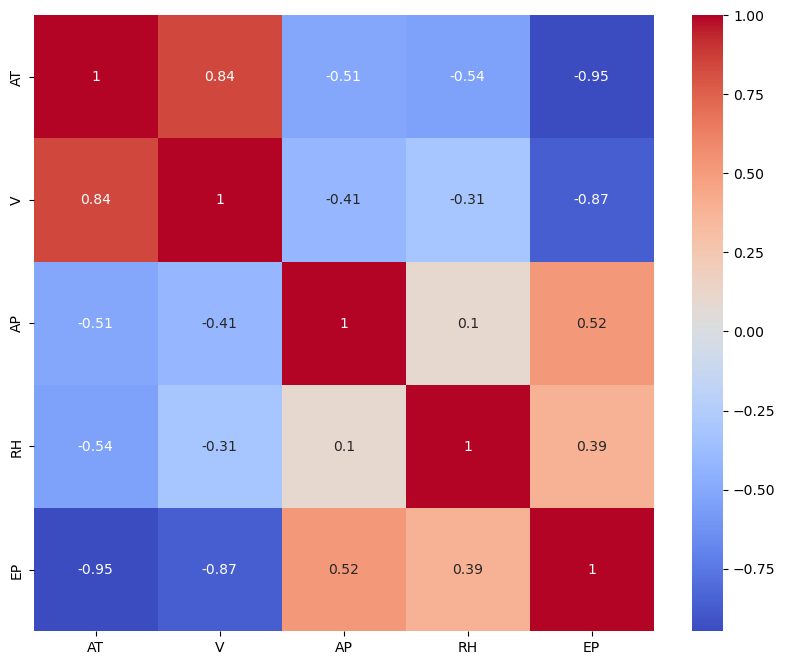

In [45]:

corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


AT and V are the most correlated with the target EP but negatively, meaning that when AT and V increase, EP decreases. Knowing this, we will use AP wich is the most correlated with EP positively.

## [graded question] Fit a simple linear regression model using as target variable EP, denoted Y , and as feature variable the most correlated variable to it that you identified in the previous question, denoted X :

In [58]:
# import linear regression model
from sklearn.linear_model import LinearRegression

# Define the predictor (X) and target variable (Y)
X = df['AT'].values.reshape(-1, 1)
Y = df['EP']

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, Y)


LinearRegression()

## 1. What are the coefficient estimates ? Interpret coefficient estimate βˆ

In [59]:
# Coefficient estimates (β0 and β1)
beta_0 = linear_model.intercept_
beta_1 = linear_model.coef_[0]

beta_0, beta_1

(497.03411989276685, -2.1713199585177985)

Pour chaque unité d'augmentation de "AT", la valeur cible "EP" diminue en moyenne de 2.1713 unités,

## 2. Give the general expression of a 1 − α confidence interval for the parameter β1. Calculate the95% confidence interval for this coefficient. Interpret the results.

In [62]:
# Using statsmodels to get more detailed statistics
import statsmodels.api as sm
X_sm = sm.add_constant(X) # adding a constant for statsmodels
model_sm = sm.OLS(Y, X_sm).fit()

# 95% confidence interval for β1
confidence_interval = model_sm.conf_int(0.05)
confidence_interval

,0,1
const,496.727476,497.340763
x1,-2.185910,-2.156730


L'intervalle est [-2.18591, -2.15673]. Cela signifie que nous sommes à 95% confiants que le véritable β₁ (l'effet de "AT" sur "EP") est compris entre ces valeurs.

## 3. Elaborate the zero slope hypothesis test for coefficient β1 and conclude if there is an impact of the predictor on the number of shares. Is β1 significantly non zero ?


In [63]:
t_test_result = model_sm.t_test([0, 1])
t_test_result


<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.1713      0.007   -291.715      0.000      -2.186      -2.157

Le test d'hypothèse (p-value < 0.05) confirme que β₁ est significativement non nul. Cela indique un impact significatif de la variable "AT" sur "EP".

## 4. What is the value of the coefficient of determination R2 ? Interpret this result. Is this model suitable to predict the number of shares ?

In [65]:
r_squared = model_sm.rsquared

confidence_interval, t_test_result, r_squared

(                0           1
 const  496.727476  497.340763
 x1      -2.185910   -2.156730,
 <class 'statsmodels.stats.contrast.ContrastResults'>
                              Test for Constraints                             
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 c0            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
 ==============================================================================,
 0.8989475964148236)

 R² indique que 89.9% de la variance de "EP" est expliquée par la variable "AT". Ce résultat suggère que le modèle est assez bon pour prédire "EP", mais il y a toujours une partie de la variance qui n'est pas capturée par le modèle.

# Feature selection for multiple linear regression

## 1. [graded question] Use Best Subset Selection method to select the best model for any possible number of features ranging from 1 to 4. Plot the curve R¯2 versus the number of features. Then, select the best model. That is, the model for which the adjusted coefficient of determination R¯2 is the highest.


## 3. [graded question] Why is it more appropriate to use the adjusted coefficient of determination R¯2 instead of the coefficient of determination R2 when comparing two models with different numbers of predictors ?


## 4. [graded question] For the selected model, what are the values of the coefficient estimates ? Interpret them. What is the value of the coefficient of determination R2 ? Interpret this value.


## 5. [graded question] For the selected model, perform the zero slope hypothesis test for all the coefficients except β0 and conclude.


## 6. [graded question] For the selected model, make a prediction of the electrical energy production given the following conditions : temperature of 22◦C, atmospheric pressure 1010 mbar, relative humidity 80% and exhaust vacuum 75.

In [ ]:
import statsmodels.api as sm
import itertools

data=pd.read_csv('/Users/william/Downloads/CCPP_data.txt', sep='\t')

# Sélectionner la variable cible (target variable) et les prédicteurs (predictors)
X = data.drop('EP', axis=1)  # 'EP' est notre variable cible
y = data['EP']
print(X)
print(y)
# Définir les fonctions nécessaires
def fit_linear_regression(X, y):
    X = sm.add_constant(X)  # Ajouter une colonne constante pour le terme constant
    model = sm.OLS(y, X).fit()  # Modèle de régression linéaire
    return model

def calculate_adjusted_r2(model, X):
    r2 = model.rsquared  # R²
    n = len(y)
    k = X.shape[1] - 1  # Nombre de prédicteurs
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # R² ajusté
    return adjusted_r2

# Performer la sélection du meilleur sous-ensemble
best_model = None
best_features = None
best_adjusted_r2 = -1
adjusted_r2_values = []  # Stocker les valeurs de R2 ajusté pour le graphique
num_predictors_values = []  # Stocker les valeurs des prédicteurs

for num_features in range(1, 5):
    # Générer toutes les combinaisons possibles de prédicteurs
    feature_combinations = itertools.combinations(X.columns, num_features)

    for features in feature_combinations:
        selected_features = list(features)
        X_subset = X[selected_features]

        # Ajuster le modèle de régression linéaire
        model = fit_linear_regression(X_subset, y)

        # Calculer le R² ajusté
        adjusted_r2 = calculate_adjusted_r2(model, X_subset)
        adjusted_r2_values.append(adjusted_r2)
        num_predictors_values.append(num_features)

        # Mettre à jour le meilleur modèle si nécessaire
        if adjusted_r2 > best_adjusted_r2:
            best_model = model
            best_features = selected_features
            best_adjusted_r2 = adjusted_r2

# Vérifier les dimensions
assert len(adjusted_r2_values) == 2**len(X.columns) - 1, "Les dimensions ne correspondent pas"

# Afficher la courbe
plt.plot(num_predictors_values, adjusted_r2_values, marker='o', label='R² ajusté')
plt.title('Courbe R² ajusté en fonction du nombre de prédicteurs')
plt.xlabel('Nombre de prédicteurs')
plt.ylabel('R² ajusté')
plt.legend()
plt.show()
# Afficher les résultats
print(f"1. Meilleur modèle avec {len(best_features)} prédicteur(s): {best_features}")
print(f"2. Nombre de prédicteurs conservés : {len(best_features)}")
print(f"3. Il est plus approprié d'utiliser le R² ajusté car il pénalise l'ajout de prédicteurs inutiles.")
print(f"4. Coefficients du modèle : {best_model.params}")
print(f"   Valeur du R² : {best_model.rsquared}")
# 5. Test d'hypothèse de pente nulle pour tous les coefficients sauf β0
test_coefs = [0] + [1] * len(best_features)
hypothesis_test = best_model.t_test(test_coefs)

print("Test d'hypothèse de pente nulle pour tous les coefficients sauf β0 :")
print(hypothesis_test)

: 